# (Ford Gobike 2018 Dataset Exploration )
## by (Norah Abdulaziz Alshammari)

## Preliminary Wrangling

>  Bay Wheels also known as Ford GoBike trip is a dataset for public use it and contains information about trips duration, trips starting and ending stations,...etc. in this document, I will explore and visualize this dataset.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os 
import datetime


%matplotlib inline

In [2]:
#read the csv file
df=pd.read_csv('GoBike_dataset.csv')
print(df.shape)
df.head()

(1863721, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


# Dataset Assessing And Cleaning 

In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [5]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [6]:
#drop null values
df.dropna(inplace=True)

In [7]:
#fix some data types
df.start_station_id =df.start_station_id.astype(str)
df.end_station_id= df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

df.member_gender=df.member_gender.astype('category')

df.start_time= pd.to_datetime(df.start_time)
df.end_time= pd.to_datetime(df.end_time)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(5), int64(1), object(7)
memor

resource of how to extract month and weekday name and day period
https://www.programiz.com/python-programming/datetime/strftime 

In [8]:
#extract the trip start and end short cut of month for ex jan,feb,... 
df['start_month']= df.start_time.dt.strftime('%b')
df['end_month']= df.end_time.dt.strftime('%b')

#extract the short cut of week day for ex sun,mon,...
df['start_day']=df.start_time.dt.strftime('%a')
df['end_day']=df.end_time.dt.strftime('%a')

#extract wether the trip was in AM (Ante meridiem: Before noon ) or PM (Post meridiem: After noon)
df['trip_starting_Period']=df.start_time.dt.strftime('%p')
df['trip_ending_Period']=df.start_time.dt.strftime('%p')

df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,end_month,start_day,end_day,trip_starting_Period,trip_ending_Period
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,Jan,Feb,Wed,Thu,PM,PM
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,Jan,Feb,Wed,Thu,PM,PM
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,Jan,Feb,Wed,Thu,PM,PM
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,Jan,Feb,Wed,Thu,PM,PM
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,No,Jan,Jan,Wed,Wed,PM,PM


create season column based on month column 
source: https://stackoverflow.com/questions/48369929/creating-a-new-column-based-on-the-values-of-other-columns

In [9]:
df['season'] = " "        
df.loc[(( df['start_month']=="Mar") |(df['start_month']=="Apr")|(df['start_month']=="May")), 'season'] = 'spring'
df.loc[(( df['start_month']=="Jun") |(df['start_month']=="Jul")|(df['start_month']=="Aug")), 'season'] = 'summer' 
df.loc[(( df['start_month']=="Sep") |(df['start_month']=="Oct")|(df['start_month']=="Nov")), 'season'] = 'fall'
df.loc[(( df['start_month']=="Dec") |(df['start_month']=="Jan")|(df['start_month']=="Feb")), 'season'] = 'winter'



In [10]:
df.season.value_counts()

summer    543474
fall      494817
spring    391514
winter    311751
Name: season, dtype: int64

In [11]:
df.start_month.value_counts()

Oct    191485
Jul    183694
Jun    181405
Aug    178375
Sep    174768
May    167376
Nov    128564
Dec    126162
Apr    121791
Mar    102347
Feb     98626
Jan     86963
Name: start_month, dtype: int64

In [12]:
# to change the data type to category
def to_cat (categories, ordered,list_col):
    cat =pd.api.types.CategoricalDtype(ordered=ordered,categories= categories)
    for col in list_col:
        df[col]=df[col].astype(cat)
    return 

In [13]:
#change the type of week days to category

week_days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
list_col=['start_day','end_day']
to_cat(week_days,True,list_col)

In [14]:
#change the type of months to category
months=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
list_col=['start_month','end_month']
to_cat(months,True,list_col)

In [15]:
#change the type of seasons to category
seasons=['spring','summer','fall','winter']
list_col=['season']
to_cat(seasons,True,list_col)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  start_month              category      
 17  end_month                ca

In [17]:
df.start_month.value_counts()

Oct    191485
Jul    183694
Jun    181405
Aug    178375
Sep    174768
May    167376
Nov    128564
Dec    126162
Apr    121791
Mar    102347
Feb     98626
Jan     86963
Name: start_month, dtype: int64

In [18]:
df.member_birth_year = 2020 - df.member_birth_year

#rename the column to member_age 
df.rename(columns={'member_birth_year':'member_age'}, inplace=True)


In [19]:
df.member_age.describe()

count    1.741556e+06
mean     3.693921e+01
std      1.045133e+01
min      2.000000e+01
25%      2.900000e+01
50%      3.500000e+01
75%      4.200000e+01
max      1.390000e+02
Name: member_age, dtype: float64

In [20]:
#change the unit to min 
df.duration_sec = df.duration_sec /60
#rename the column to duration_min
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_min             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_age               float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  start_month              category      
 17  end_month                ca

In [22]:
df.nunique()

duration_min                 13154
start_time                 1741433
end_time                   1741457
start_station_id               331
start_station_name             348
start_station_latitude         351
start_station_longitude        351
end_station_id                 331
end_station_name               348
end_station_latitude           351
end_station_longitude          351
bike_id                       4853
user_type                        2
member_age                      86
member_gender                    3
bike_share_for_all_trip          2
start_month                     12
end_month                       12
start_day                        7
end_day                          7
trip_starting_Period             2
trip_ending_Period               2
season                           4
dtype: int64

In [23]:
df.to_csv('GoBike_dataset_cleand.csv', index = False)

### What is the structure of your dataset?

> this dataset contains data for 1,863,721 ford gobike trips and 16 feature for each trip and I extract some addintinal features to help me in exploration process .

### What is/are the main feature(s) of interest in your dataset?

>  the duration of the trip and the number of trips, in my opinion, are the main features in this dataset, I want to discover the effect of other features such gender, age, season, trip starting\ending Period, starting day ...etc on the main features, so that we know when to offer promotions and the target users age their gender, in which period of day more bikes should be provided, in which season the demand for bikes increases and in which season it decreases.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the gender , age , season , trip starting\ending Period ,starting / ending day , starting/ending month  and user type.

## Univariate Exploration


#### what is the distribution of trip durations ?

Text(0.5, 1.0, 'The Distribution Of Trip Durations')

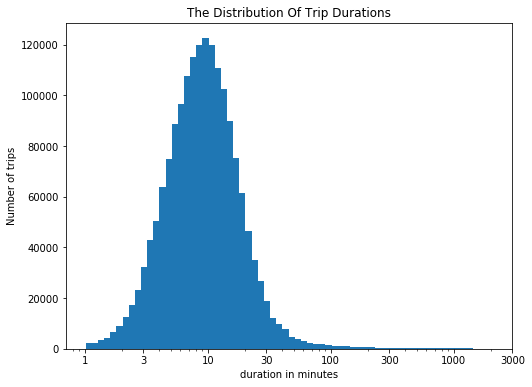

In [24]:
plt.figure(figsize=[8, 6])
bins = 10 ** np.arange(np.log10(df.duration_min.min()), np.log10(df.duration_min.max())+0.05, +0.05)
ticks = [1,3,10,30, 100, 300, 1000,3000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('duration in minutes')
plt.ylabel('Number of trips')
plt.title('The Distribution Of Trip Durations')

* the plot above shows that Most trips duration are from 5 to 23 minutes.

#### Which age group has more number trips ?

Text(0, 0.5, 'Number of trips')

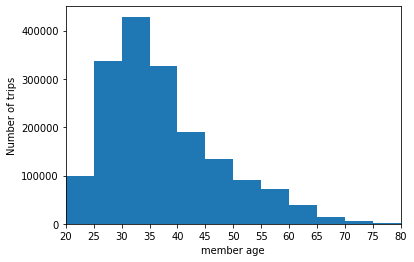

In [25]:
bins = np.arange(df.member_age.min(),df.member_age.max()+5, +5)
plt.hist(data = df, x ='member_age', bins = bins);
plt.xticks([20,25,30,35,40,45,50,55,60,65,70,75,80])
plt.xlim(20,80)

plt.xlabel('member age')
plt.ylabel('Number of trips')

* the members whose ages are between 30 and 35 have the highest number of trips .

#### What type of user takes more trips? 

Text(0.5, 0, 'user type')

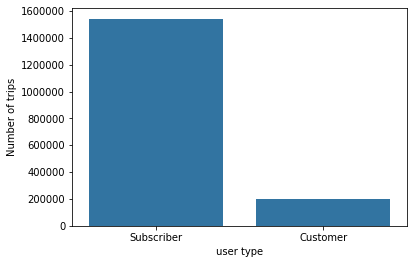

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.ylabel('Number of trips')
plt.xlabel('user type')

* the plot above shows that the subscriber users have a higher number of trips than the customers. 

Text(0, 0.5, 'Number of trips')

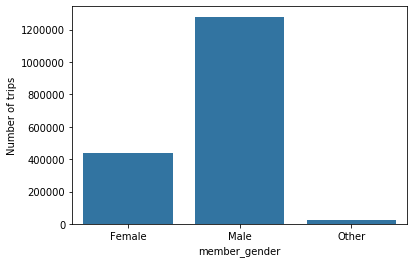

In [27]:
sb.countplot(data = df, x = 'member_gender', color = base_color)
plt.ylabel('Number of trips')

* We can see that most of the trips were made by males

#### In which month the demand for bikes increases and in which month does it decrease ?

Text(0, 0.5, 'Number of trips')

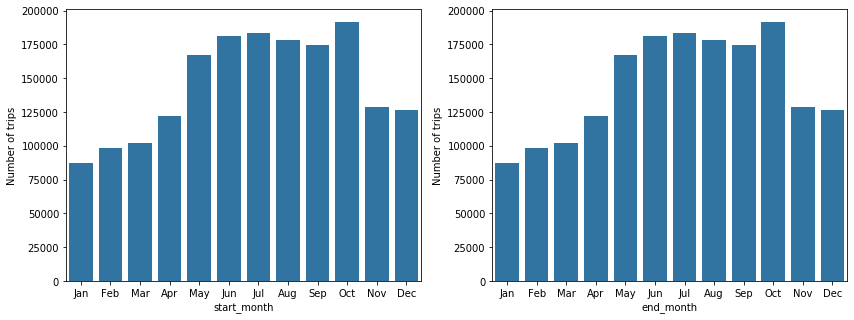

In [28]:
plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'start_month', color = base_color)
plt.ylabel('Number of trips')

plt.subplot(1, 2, 2)
sb.countplot(data = df, x ='end_month', color = base_color)
plt.ylabel('Number of trips')



Text(0, 0.5, 'Number of trips')

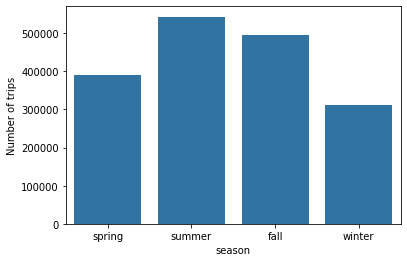

In [29]:
sb.countplot(data = df, x ='season', color = base_color)
plt.ylabel('Number of trips')

* We can see that there is a high demand for bikes in October so that the number of trips is the highest whereas the lowest demand was in January where. And that's because of the weather I think, and when you look at the season plot, we find that the number of trips in summer and fall is greater than the number of trips in winter and spring.

#### Does the demand for bicycles increase at the weekend?

Text(0, 0.5, 'Number of trips')

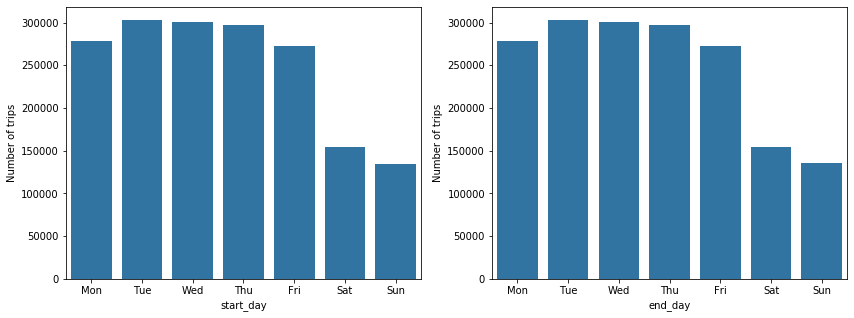

In [30]:
plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df, x ='start_day', color = base_color)
plt.ylabel('Number of trips')

plt.subplot(1, 2, 2)
sb.countplot(data = df, x ='end_day', color = base_color)
plt.ylabel('Number of trips')

* the plot shows that the demand for bikes actually decreases at the weekend and the number of trips is higher on weekdays.
* the day with the highest trip number is Tue.
* the day with lowest trip number is Sun.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> in trip duration distribution I notice that the  distribution has a long right tail so I rescale the x-axis to be logarithmic scale, and I find that most trips duration is from 5 to 23 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes the distribution of trip duration and the distribution of age , in the distribution of trip duration I rescal x-axix to be In logarithmic scale , and in distribution of age I but limit on x-axis to focus in range from 0 to 80 .

## Bivariate Exploration

##### At first, I will heatmap displays correlation coefficients of numeric variable to discover if there interesting relationships

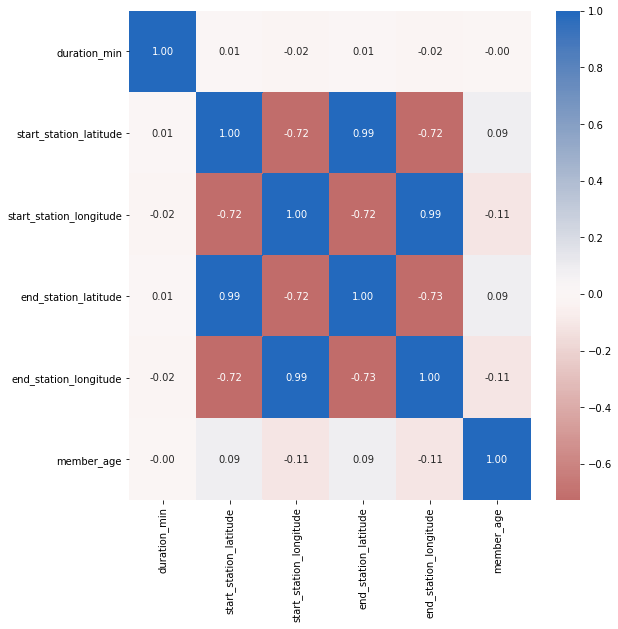

In [31]:
plt.figure(figsize = [9,9])
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

### the relationship between user_type and member_gender

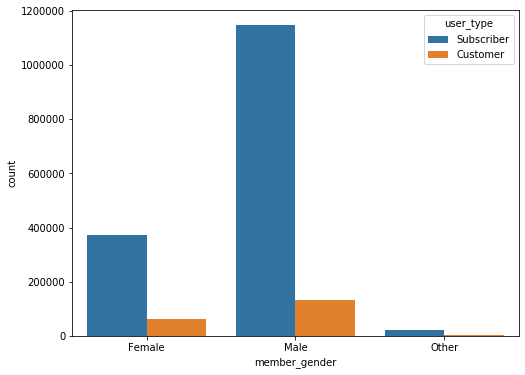

In [32]:
plt.figure(figsize=[8, 6])
sb.countplot(data = df, x = 'member_gender', hue = 'user_type')


* there are more male customer than the female customer but they represent a smaller percentage of the total number of males than females .

### the relationship between member_gender and member_gender

(20, 75)

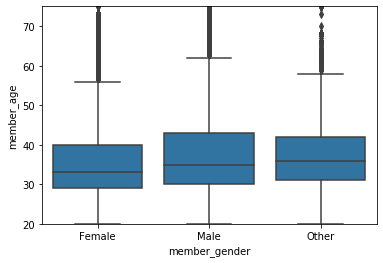

In [33]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'member_age', x = 'member_gender', color = base_color)
#set limit on age to avoid Outliers noise
plt.ylim(20,75)

* male member age median and 75th percentile is higher than female member median
* all gender has the same minmum value 

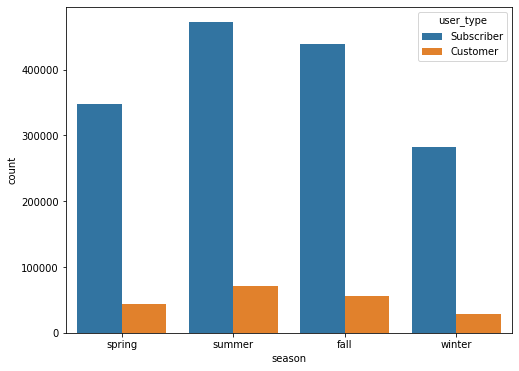

In [34]:
plt.figure(figsize=[8, 6])
sb.countplot(data = df, x = 'season', hue = 'user_type')

* both customer an subscruber has higher number of trips in summer and lower number of trip in winter

### the relationship between member_gender and duration_min

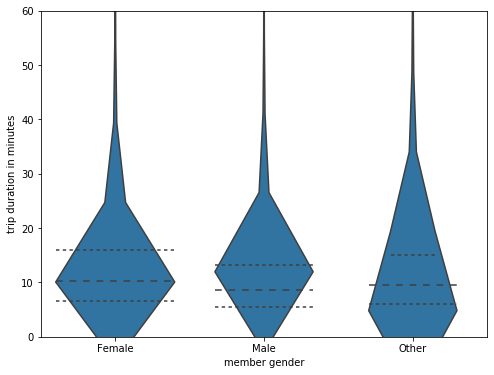

In [35]:
plt.figure(figsize=[8, 6])
sb.violinplot(data=df, x='member_gender', y='duration_min', color=base_color, inner='quartile');
#set limit on age to avoid Outliers noise
plt.ylim(0,60)
plt.xlabel('member gender');
plt.ylabel('trip duration in minutes');

* there is no significant difference between the genders but we can notice the the female median and 75th percentile trip duration is slightly higher than the male trip duration.

### the relationship between member_gender and duration_min that higher than 360 minutes

Text(0.5, 1.0, 'trip duration higher the 360 min')

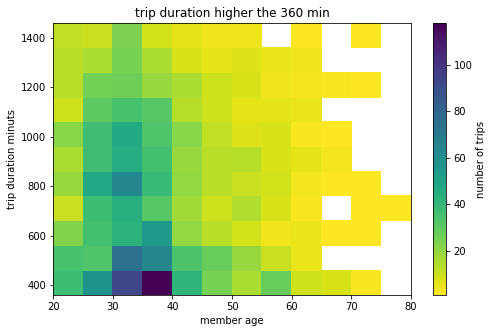

In [49]:
df_sub=df.query('duration_min>360')

plt.figure(figsize = [8 , 5])

bins_x = np.arange(20, 80+5, 5)
bins_y = np.arange(df_sub.duration_min.min(),df_sub.duration_min.max()+100, 100)

plt.hist2d(data = df_sub, x = 'member_age', y = 'duration_min',bins = [bins_x, bins_y],cmin = 0.5,cmap = 'viridis_r')


plt.colorbar(label='number of trips')
plt.xlabel('member age')
plt.ylabel('trip duration minuts')
plt.title ('trip duration higher the 360 min')


* the plot shows that the trips with duration higher than 360 minutes (6 hours) is mostly taken by member whos age between 30 and 40.

### the relationship between user_type and avg.duration_min

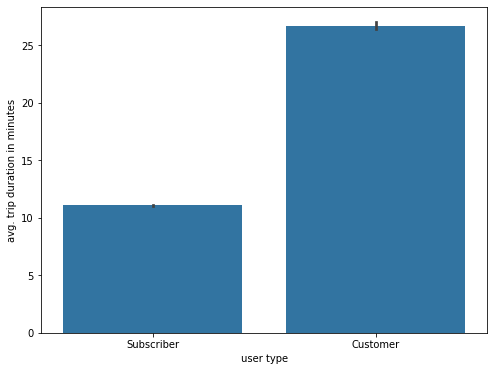

In [37]:
plt.figure(figsize=[8, 6])
sb.barplot(data=df, x='user_type', y='duration_min', color=base_color);

plt.xlabel('user type');
plt.ylabel('avg. trip duration in minutes');

* As it is obvious in the plot above, customers have the higher average trip duration Although they are less numerous than the subscribers

### the relationship between member_gender and avg.duration_min

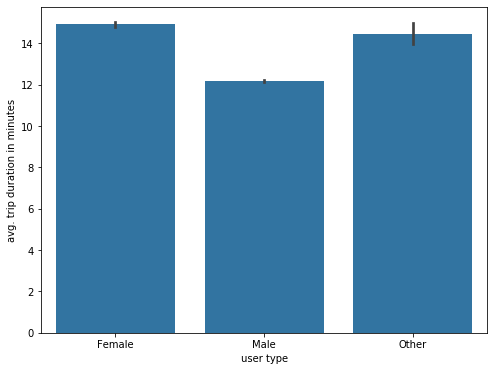

In [38]:
plt.figure(figsize=[8, 6])
sb.barplot(data=df, x='member_gender', y='duration_min', color=base_color);

plt.xlabel('user type');
plt.ylabel('avg. trip duration in minutes');

* As it is obvious in the plot above, female and other have the higher average trip duration than the males Although they are less numerous than the males.

### the relationship between start month and start day

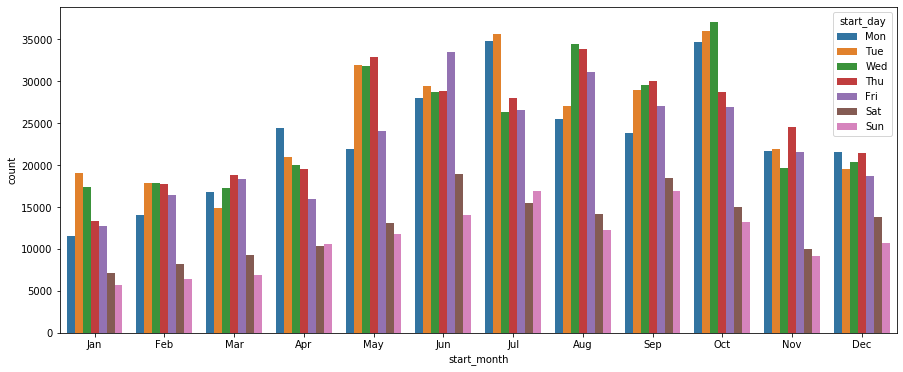

In [45]:
plt.figure(figsize=[15, 6])
sb.countplot(data = df, x = 'start_month', hue = 'start_day')
plt.ylabel('Number of trips')


* the plot above shows that in which day of the month the demand for bikes increases and in which day month does it decrease and as we can see that January Sundays has the lowest demand whereas October Wednesdays has the highest demands on bikes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 
> * the relationship between the member age and the duration of trip so that the members whos age between 30 and 40 are more likly to have long duration trips.
> * the customer tends to has higher avg. trip durations .
> * avg.trip duration in weekend is higher than avg.trip duration in weekdays although that the number of trips in weekends is less.
>* female and others have higher avg. trip durations than male.
>* January Sundays has the lowest demand whereas October Wednesdays has the higher demands  on bikes
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  yes the relationship  start_station_latitude  and end_station_latitude it seem interesting

## Multivariate Exploration



### the effect of user type and age on long trip duration

C:\Users\Norh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


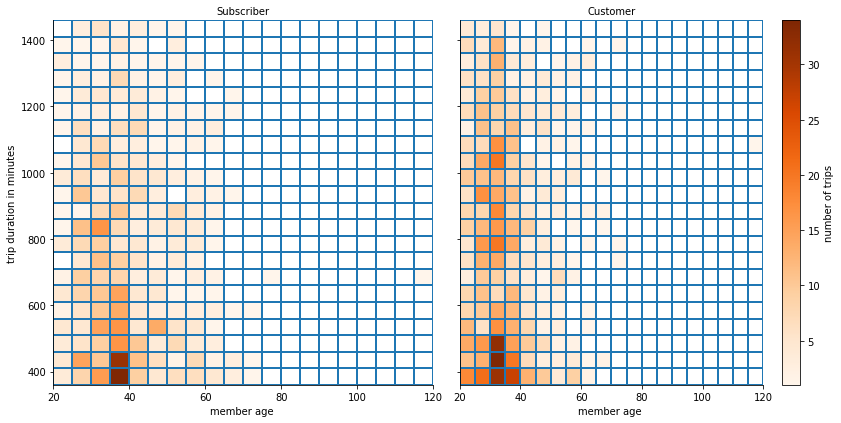

In [39]:
bins_x = np.arange(df_sub.member_age.min(), df_sub.member_age.max()+5, 5)
bins_y = np.arange(df_sub.duration_min.min(), df_sub.duration_min.max()+50, 50)

g = sb.FacetGrid(data = df_sub, col = 'user_type', size = 6, col_wrap = 2)
g.map(plt.hist2d, 'member_age', 'duration_min',cmin=0.5,bins = [bins_x, bins_y], cmap='Oranges')

g.set_ylabels('trip duration in minutes')
g.set_xlabels('member age ')
g.set_titles('{col_name}')


plt.colorbar(label = 'number of trips');


### the effect of the gender and age on trip duration

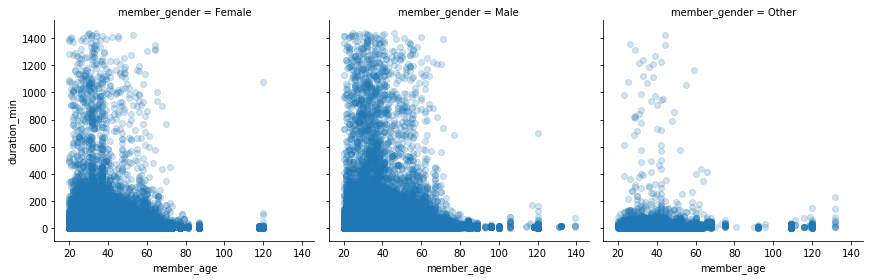

In [40]:
g = sb.FacetGrid(data = df, col = 'member_gender', size = 4,col_wrap = 4)
g.map(plt.scatter, 'member_age', 'duration_min',alpha=1/5)

* the plots above shows that the trips with high duration are mostly taken by males whos age between 20 and 40 

### the effect of the season on average trip duration on week day 

C:\Users\Norh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


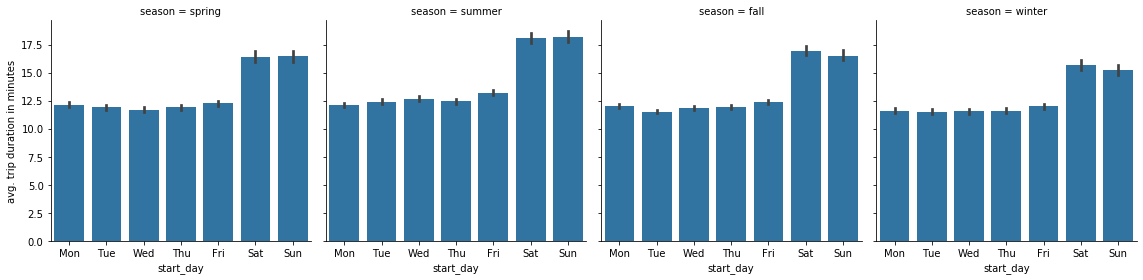

In [50]:
g = sb.FacetGrid(data = df, col = 'season', height = 4,col_wrap = 4)
g.map(sb.barplot, 'start_day', 'duration_min')
g.set_ylabels('avg. trip duration in minutes')

* the average trip duration decreases in winter and increases in summer, It is also possible to notice that the average trip duration is higher in the summer than all seasons.

### the effect of the season and the age on trip duration 

C:\Users\Norh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


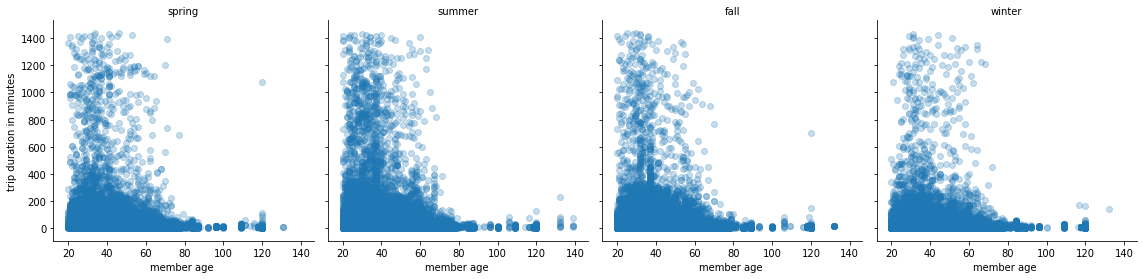

In [42]:
g = sb.FacetGrid(data = df, col = 'season', size = 4, col_wrap = 4)
g.map(sb.regplot, 'member_age', 'duration_min', fit_reg = False, scatter_kws = {'alpha' : 1/4})

g.set_ylabels('trip duration in minutes')
g.set_xlabels('member age ')
g.set_titles('{col_name}')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> yes , i find that the trip duration is effected by the age and the gender of the users , also the trip duration is effected by the wether so that the number of trips with high durations dicreces in winter and spring , also i can see that the number of long trip duration for customers whose ages between 20 and 40 is higher than the number of long trip duration for subscribers whose in the same age 

### Were there any interesting or surprising interactions between features?

> it is surprising that number of long trip duration for customers whose ages between 20 and 40 is higher than the number of long trip duration for subscribers whose in the same age although the number of subscribers is much greater than the number of cutomers.